In [ ]:
import numpy as np 
import matplotlib.pyplot as plt 
from qnetwork.tools import set_plot_style
from scipy.signal import correlate
from experiment_3 import exp003
from experiment_4 import exp004

set_plot_style()

# Two qubits in a cavity 

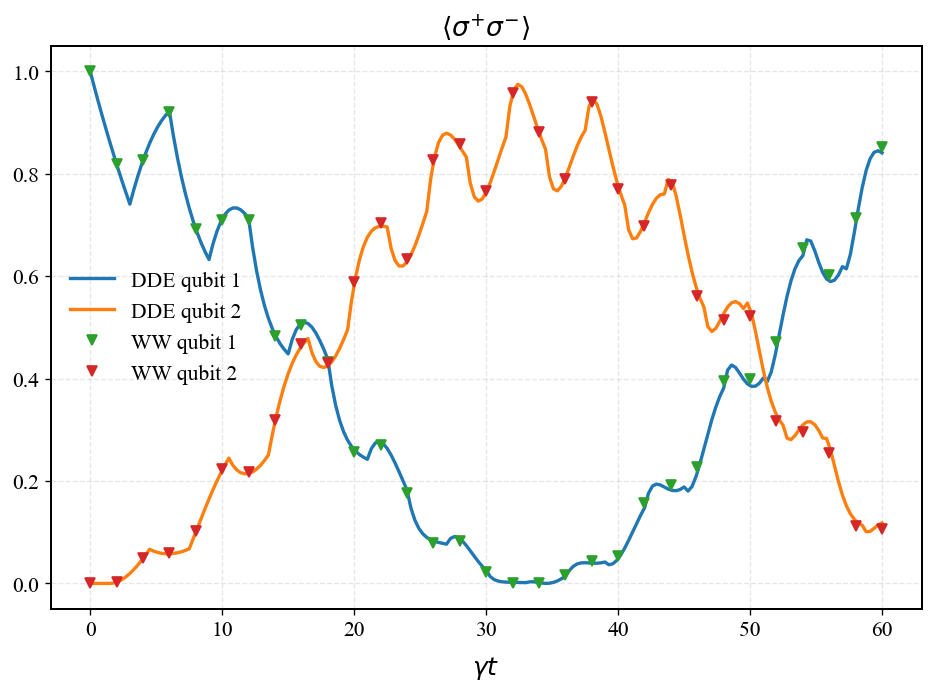

In [53]:
_,_=exp003(phi=100.5*np.pi,n_steps=601,gamma=0.1,L=1.2,c=0.8,t_max=60)

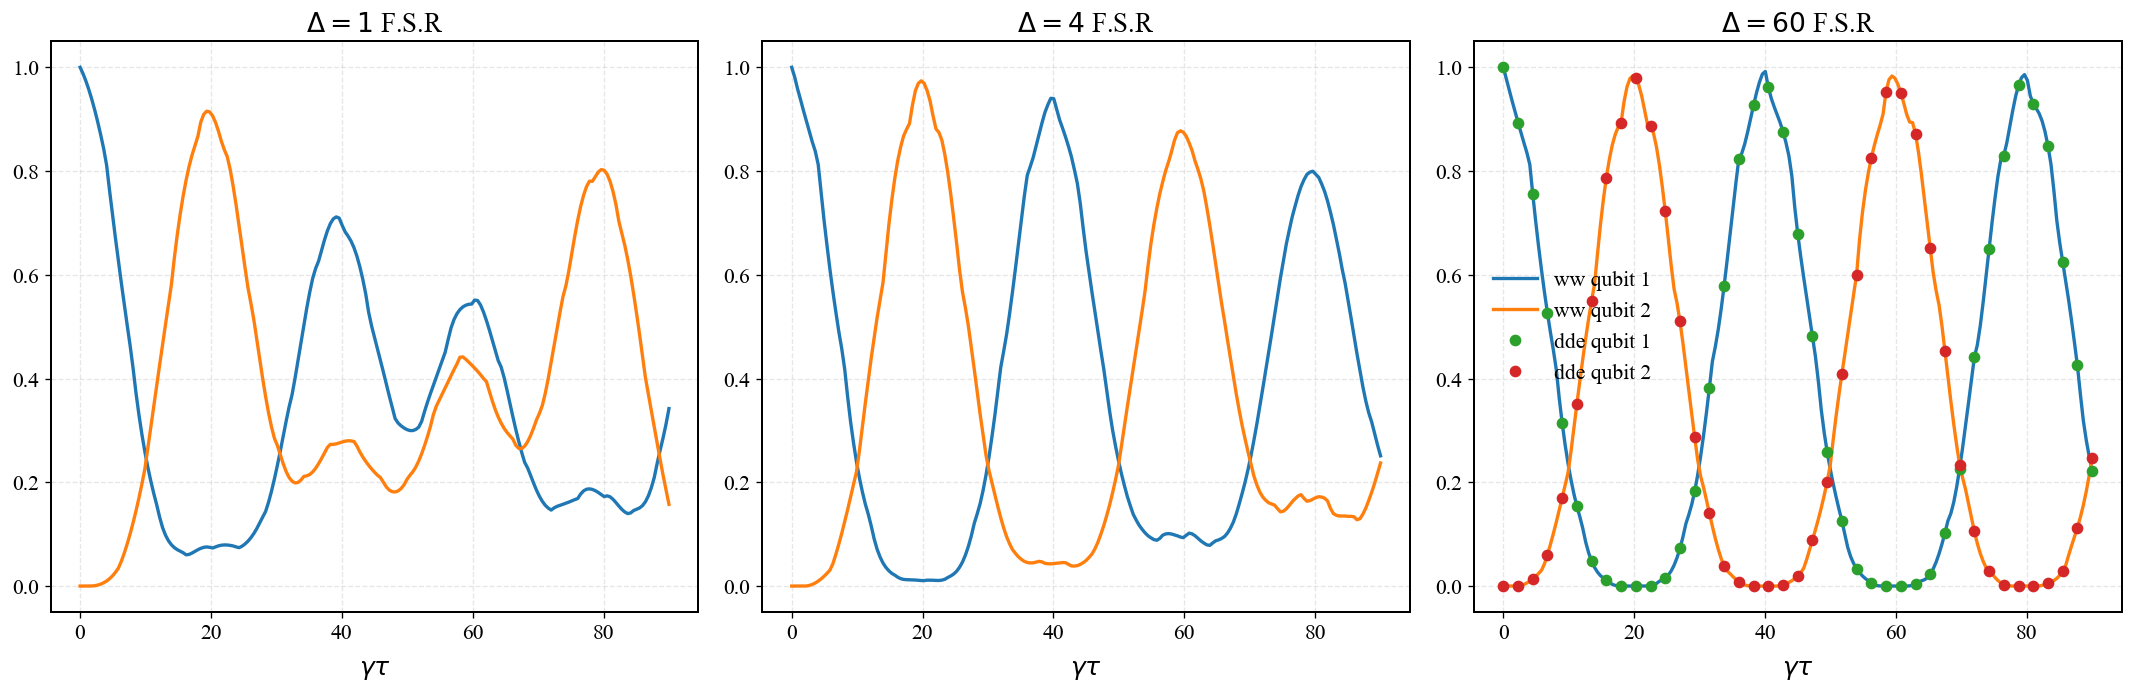

In [54]:
exp004(phi_list=[1*np.pi,4*np.pi,60*np.pi],gamma=0.05,t_max=90)

# Characterization of Rabi-Like behavior 

The points to show in this section are 
1. The DDE contain Rabi physics 
2. The Rabi oscillations are 'protected' by symmetry in high energetic modes of the coupling 

In [ ]:
from scipy.signal import find_peaks
from typing import Optional
from qnetwork.multiphoton_ww import EmittersInWaveguideMultiphotonWW
from aux_funs import DDE_analytical


def run_ww_simulation(t_max: Optional[float] = None , gamma :float = 0.1, Delta: float = 10.0 , L:float = 1, c: float = 1, n_steps: int = 201,n_modes=20):
	tau=2*L/c
	if t_max is None:
		t_max = 25*tau 
	setup=EmittersInWaveguideMultiphotonWW(gamma=gamma,Delta=Delta,L=L,c=c,positions=[0.0], n_modes=n_modes, n_excitations=list(range(2)))
	t,e = setup.evolve(t_max,n_steps=n_steps,initial_state="1")
	return t,e

def run_dde_simulation(t: list|np.ndarray , gamma :float = 0.1, tau: float=2,phi: float = 10.0,):
	return np.abs(DDE_analytical(gamma=gamma,phi=phi,tau=tau,t=t))**2



def exp005(t_max: Optional[float] = None , gamma :float = 0.1, Delta: float = 10, L:float = 1, c: float = 1, n_steps: int = 201,plot_bool:bool =True): 

	t = np.linspace(0,t_max,n_steps)
	phi = 2*np.pi*Delta
	tau = 2*L/c
	e_dde = run_dde_simulation(t=t,gamma=gamma,tau=tau,phi=phi)
	e_rabi = np.cos(np.sqrt(gamma/tau)*t)**2

	dt = t[1]-t[0] 
	corr = correlate(e_dde-np.mean(e_dde),e_dde-np.mean(e_dde))
	#corr = correlate(e_dde,e_dde)
	corr_positive = corr[t.shape[0]-1:]
	corr_positive=corr_positive/corr_positive[0]
	peaks_corr,_=find_peaks(corr_positive)
	
	correlation_times=corr_positive[peaks_corr]

	corr_rabi = correlate(e_rabi-np.mean(e_rabi),e_rabi-np.mean(e_rabi))
	#corr_rabi = correlate(e_rabi,e_rabi)
	corr_rabi_positive = corr_rabi[t.shape[0]-1:]
	corr_rabi_positive = corr_rabi_positive/corr_rabi_positive[0]
	peaks_corr_rabi,_=find_peaks(corr_rabi_positive)
	if plot_bool:
		plt.plot(t/tau,corr_positive,label='DDE')
		plt.plot((t/tau)[peaks_corr],correlation_times,'o')
		plt.plot(t/tau,corr_rabi_positive,'r--',label='Rabi')
		plt.plot((t/tau)[peaks_corr_rabi],corr_rabi_positive[peaks_corr_rabi],'o')
		
		plt.axvline(np.pi/np.sqrt(gamma*tau),color='k',linestyle='-.',alpha=0.5,label=r'$\frac{\pi}{\sqrt{\gamma \tau}}$')
		plt.grid()
		plt.legend()
		plt.xlabel(r"$t/\tau$")
		plt.show()
	return t[peaks_corr]

#def exp004(t_max: Optional[float] = None , gamma :float = 0.1, Delta: float = 10, L:float = 1, c: float = 1, n_steps: int = 201,n_modes=20,plot_bool:bool =True): 

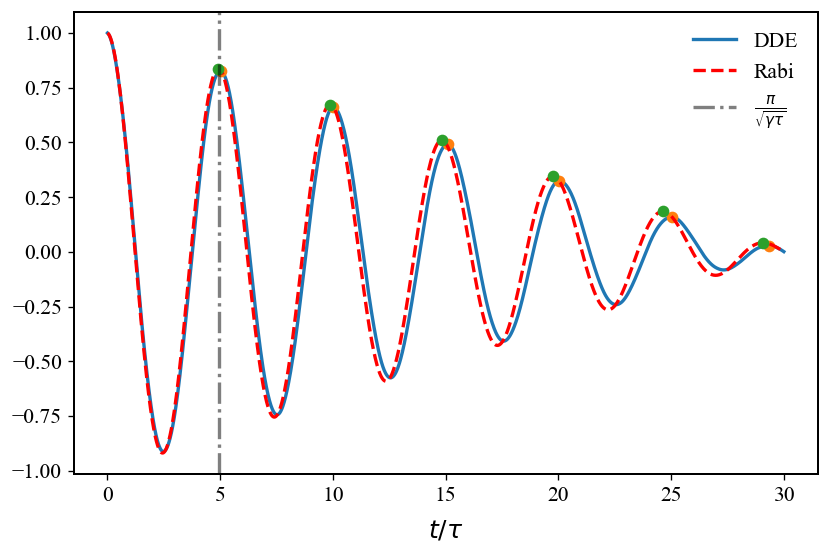

In [68]:
t_corr=exp005(gamma=0.2,t_max=60,n_steps=2501)

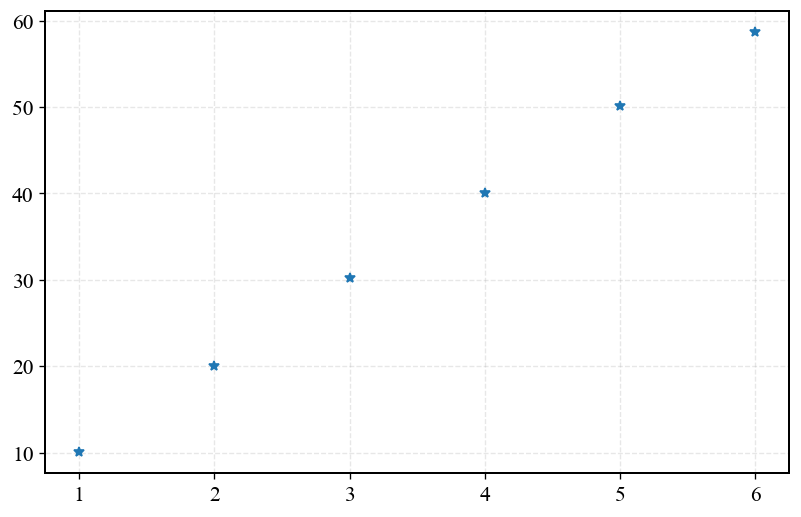

In [70]:
plt.plot(range(1,len(t_corr)+1),t_corr,'*')

In [ ]:
from numpy.fft import fft, fftfreq,fftshift

def fast_ft(x,y):
	''' regular spacing  is assumed''' 
	N =len(y)
	dt = x[1]-x[0]
	u = fftshift(fft(y)) 
	w = fftshift(fftfreq(N,dt)) 
	return u,w

	

def exp006(t_max:float,
		   gamma:float=1,
		   Delta:float=10,
		   L:float=1,
		   c:float=1,
		   n_modes:int=50,
		   n_steps:int=1001,
		   n_steps_range: int = 200):
	'''determine an approximated period using fast fourier transform techniques. The idea is to use different number of steps '''

	steps_range = np.asarray([])

	
	
	

	
